## Processing ZTF alerts using alerce

### Import python libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
from mpl_toolkits.axes_grid1 import make_axes_locatable

import os
import io
import gzip
import tarfile
import warnings

import numpy as np
import pandas as pd
from tqdm import tqdm

from alerce.core import Alerce
alerce = Alerce()

from astropy.time import Time
from astropy.io import fits
import astropy.units as u
import aplpy
%matplotlib inline

### Get time-series images of ZTF objects using their unique identifiers

In [2]:
ZTF_transient_list = np.load("data/ZTF_selection.npz")['transient_selection_list'].tolist()

In [3]:
ztf_ID = []
ztf_time_series_images = []

In [4]:
len(ZTF_transient_list)

3971

In [6]:
#ztf_ID = []
#ztf_time_series_images = []
#pbar = tqdm(total=len(ZTF_transient_list))
pbar = tqdm(total=len(ZTF_transient_list[3903:]))

for ztf in ZTF_transient_list[3903:]:    
    r_band = False
    detections = alerce.query_detections(ztf, format="json")   # to get access to detected transients 
    transient_candid = []
    for i in range(len(detections)):
        if detections[i]['fid'] == 2: # r-band
            r_band = True
            transient_candid.append(detections[i]['candid'])

    transient_time_series_images = []
    for k in transient_candid:
        hdul = alerce.get_stamps(oid = ztf, candid = k)
        if hdul is not None:
            transient_time_series_images.append(np.nan_to_num(hdul[2].data[int(63/2)-24:int(63/2)+24,
                                                                           int(63/2)-24:int(63/2)+24]))
    if r_band:
        ztf_ID.append(ztf)
        ztf_time_series_images.append(transient_time_series_images)

    pbar.update(1)

  0%|                                                    | 0/68 [00:00<?, ?it/s]WARNING: VerifyWarning: Keyword name 'STAMP_TYPE' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created. [astropy.io.fits.card]
/Users/lea/opt/anaconda3/lib/python3.9/site-packages/alerce/stamps.py:136: RuntimeWarning: AVRO File not found.
  warnings.warn("AVRO File not found.", RuntimeWarning)
100%|███████████████████████████████████████████| 68/68 [10:25<00:00, 13.00s/it]

In [7]:
import socket
socket.setdefaulttimeout(100000)
sock = socket.socket()
sock.timeout

100000.0

In [8]:
len(ztf_ID)

65

In [11]:
ztf_time_series_images

[[array([[ -3.7894735 ,  20.008526  , -11.19447   , ...,   5.977198  ,
            6.578384  ,  -3.8837237 ],
         [ -9.816444  ,  18.397919  ,   4.0812817 , ...,  10.4023075 ,
            4.2721887 ,  -7.5633116 ],
         [ -0.97432506,  -4.829845  ,  -5.105731  , ...,  12.304589  ,
           -6.9743304 ,  -6.2359366 ],
         ...,
         [ -5.3500547 ,   1.9315542 ,   7.7468433 , ...,  -4.4974084 ,
            3.1469977 ,   0.9247755 ],
         [ -3.269399  ,   9.89151   ,  -4.187228  , ...,   5.9238873 ,
           -5.089071  , -19.71723   ],
         [  1.3124064 ,  -3.6870031 ,  19.293016  , ...,   4.700639  ,
            7.4497857 ,  -5.883322  ]], dtype=float32),
  array([[  9.358272  ,  -2.3680625 ,   2.526882  , ...,   3.5092156 ,
            6.059095  ,  -5.044978  ],
         [ -0.9193456 , -15.978263  ,  15.142821  , ...,  12.459684  ,
           16.233263  ,  -5.9349966 ],
         [ -2.3170846 ,  -4.4269295 ,   7.59841   , ...,   0.15920694,
            7.3173

### Need to apply cut-off in time series and also select a random single-epoch image from full series

In [9]:
#np.savez("data/real_ZTF_images.npz", images_time_series=ztf_time_series_images, images_single=images_single, ztf_ID=ztf_ID)

In [12]:
np.savez("ZTF_data.npz", ztf_ID=ztf_ID, ztf_time_series_images=ztf_time_series_images)

/Users/lea/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


NameError: name 'colorbar' is not defined

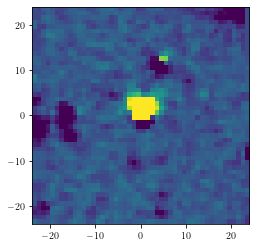

In [11]:
plt.imshow(transient_time_series_images[8], vmin=-30, vmax=100, cmap="viridis", origin="lower", extent=(-24,24,-24,24)); colorbar();

In [ ]:
import matplotlib.gridspec as gridspec

f = plt.figure(figsize=(12,4))
gs = gridspec.GridSpec(1, 6)
gs.update(wspace=0.075, hspace=0.) # set the spacing between axes.
ax0 = plt.subplot(gs[0])
ax0.imshow(transient_time_series_images[6], origin="lower", extent=(-24,24,-24,24), vmin=-50, vmax=100, cmap="cividis");
ax0.set_title(r"$t_6$", fontsize=14);
ax0.axis('off');
ax0.set_xticks([]);
ax0.set_yticks([]);
ax1 = plt.subplot(gs[1])
ax1.imshow(transient_time_series_images[7], origin="lower", extent=(-24,24,-24,24), vmin=-50, vmax=100, cmap="cividis");
ax1.set_title(r"$t_7$", fontsize=14);
ax1.axis('off');
ax2 = plt.subplot(gs[2])
ax2.imshow(transient_time_series_images[8], origin="lower", extent=(-24,24,-24,24), vmin=-50, vmax=100, cmap="cividis");
ax2.set_title(r"$t_8$", fontsize=14);
ax2.axis('off');
ax3 = plt.subplot(gs[3])
ax3.imshow(transient_time_series_images[9], origin="lower", extent=(-24,24,-24,24), vmin=-50, vmax=100, cmap="cividis");
ax3.set_title(r"$t_9$", fontsize=14);
ax3.axis('off');
ax4 = plt.subplot(gs[4])
ax4.imshow(transient_time_series_images[10], origin="lower", extent=(-24,24,-24,24), vmin=-50, vmax=100, cmap="cividis");
ax4.set_title(r"$t_{10}$", fontsize=14);
ax4.set_xticks([]);
ax4.set_yticks([]);
ax4.axis('off');
ax5 = plt.subplot(gs[5])
ax5.imshow(transient_time_series_images[11], origin="lower", extent=(-24,24,-24,24), vmin=-50, vmax=100, cmap="cividis");
ax5.set_title(r"$t_{11}$", fontsize=14);
ax5.axis('off');

#f.savefig("ZTF18aaxpois_time_series_images.pdf", bbox_inches="tight")

In [ ]:
import matplotlib.gridspec as gridspec

f = plt.figure(figsize=(12,4))
gs = gridspec.GridSpec(1, 6)
gs.update(wspace=0.075, hspace=0.) # set the spacing between axes.
ax0 = plt.subplot(gs[0])
ax0.imshow(transient_time_series_images[0], origin="lower", extent=(-24,24,-24,24), cmap="viridis");
ax0.set_title(r"$t_0$", fontsize=14);
ax0.axis('off');
ax0.set_xticks([]);
ax0.set_yticks([]);
ax1 = plt.subplot(gs[1])
ax1.imshow(transient_time_series_images[5], origin="lower", extent=(-24,24,-24,24), cmap="viridis");
ax1.set_title(r"$t_1$", fontsize=14);
ax1.axis('off');
ax2 = plt.subplot(gs[2])
ax2.imshow(transient_time_series_images[10], origin="lower", extent=(-24,24,-24,24), cmap="viridis");
ax2.set_title(r"$t_2$", fontsize=14);
ax2.axis('off');
ax3 = plt.subplot(gs[3])
ax3.imshow(transient_time_series_images[15], origin="lower", extent=(-24,24,-24,24), cmap="viridis");
ax3.set_title(r"$t_3$", fontsize=14);
ax3.axis('off');
ax4 = plt.subplot(gs[4])
ax4.imshow(transient_time_series_images[20], origin="lower", extent=(-24,24,-24,24), cmap="viridis");
ax4.set_title(r"$t_4$", fontsize=14);
ax4.set_xticks([]);
ax4.set_yticks([]);
ax4.axis('off');
ax5 = plt.subplot(gs[5])
ax5.imshow(transient_time_series_images[25], origin="lower", extent=(-24,24,-24,24), cmap="viridis");
ax5.set_title(r"$t_5$", fontsize=14);
ax5.axis('off');